<a href="https://colab.research.google.com/github/Akmazad/XTalkiiS-application/blob/main/GeneNetworkModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import display
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("/content/R_GE_data_GSE38376.csv", header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,7A5,77.970,72.450,58.93,72.170000,83.230000,82.660000,73.400000,76.410000,79.530000
1,A1BG,100.950,94.765,92.13,102.480000,103.545000,87.490000,93.755000,103.955000,91.075000
2,A1CF,79.590,78.910,74.00,78.846667,76.203333,83.873333,73.676667,77.716667,81.606667
3,A26A1,73.445,74.870,78.72,79.495000,84.435000,86.385000,87.555000,96.725000,82.015000
4,A26B1,70.860,65.470,94.37,83.630000,81.270000,72.340000,67.990000,62.990000,62.320000


In [ ]:
df1.shape

(25158, 10)

In [ ]:
df1_trans=df1.transpose()
df1_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,25148,25149,25150,25151,25152,25153,25154,25155,25156,25157
0,7A5,A1BG,A1CF,A26A1,A26B1,A26C1B,A26C3,A2BP1,A2M,A2ML1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
1,77.97,100.95,79.59,73.445,70.86,101.03,88.566667,74.27,58.2,130.51,...,820.08,667.5975,83.426,100.33,164.34,79.365,1240.98,1592.04,291.97,704.085
2,72.45,94.765,78.91,74.87,65.47,91.25,88.33,78.5025,60.9,125.94,...,883.04,579.8725,77.004,99.8,175.005,78.735,1498.08,1317.715,329.25,741.595
3,58.93,92.13,74.0,78.72,94.37,102.87,94.073333,71.3275,82.81,105.17,...,775.413333,646.46,71.566,97.21,169.755,73.645,1236.05,1420.295,276.98,670.59
4,72.17,102.48,78.846667,79.495,83.63,95.26,97.07,70.62,67.48,182.25,...,749.94,508.2,76.794,103.82,163.41,65.835,1202.04,1356.15,282.77,718.465


###Converting first row(gene names) as header of the Dataframe


In [ ]:
df1_modified = df1_trans
df1_modified.columns = df1_modified.iloc[0]
df1_modified = df1_modified.drop(0).reset_index(drop=True)
df1_modified.head(10)

,7A5,A1BG,A1CF,A26A1,A26B1,A26C1B,A26C3,A2BP1,A2M,A2ML1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,77.97,100.95,79.59,73.445,70.86,101.03,88.566667,74.27,58.2,130.51,...,820.08,667.5975,83.426,100.33,164.34,79.365,1240.98,1592.04,291.97,704.085
1,72.45,94.765,78.91,74.87,65.47,91.25,88.33,78.5025,60.9,125.94,...,883.04,579.8725,77.004,99.8,175.005,78.735,1498.08,1317.715,329.25,741.595
2,58.93,92.13,74.0,78.72,94.37,102.87,94.073333,71.3275,82.81,105.17,...,775.413333,646.46,71.566,97.21,169.755,73.645,1236.05,1420.295,276.98,670.59
3,72.17,102.48,78.846667,79.495,83.63,95.26,97.07,70.62,67.48,182.25,...,749.94,508.2,76.794,103.82,163.41,65.835,1202.04,1356.15,282.77,718.465
4,83.23,103.545,76.203333,84.435,81.27,105.32,94.013333,79.2825,63.74,189.27,...,758.883333,434.565,82.176,104.67,159.89,75.59,1367.25,1372.515,267.33,618.59
5,82.66,87.49,83.873333,86.385,72.34,124.91,96.173333,75.025,69.12,203.43,...,724.83,580.3525,74.278,102.74,198.31,72.475,1993.12,1343.165,285.7,859.51
6,73.4,93.755,73.676667,87.555,67.99,95.48,85.886667,77.955,74.69,333.78,...,535.01,321.0525,78.598,106.99,159.695,82.08,1449.37,1371.775,375.63,744.59
7,76.41,103.955,77.716667,96.725,62.99,105.84,95.466667,74.025,69.87,384.45,...,519.34,325.41,81.03,92.94,161.705,73.84,1401.76,1356.275,315.66,720.885
8,79.53,91.075,81.606667,82.015,62.32,104.75,87.56,76.205,72.02,299.56,...,595.243333,407.58,82.066,103.79,158.01,78.66,1337.73,1311.84,308.64,664.695


In [ ]:
correlation_matrix_df1 = df1_modified.astype('float64').corr(method='pearson')
correlation_matrix_df1

,7A5,A1BG,A1CF,A26A1,A26B1,A26C1B,A26C3,A2BP1,A2M,A2ML1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,,,,,,,,,,,,,,,,,,,,,
7A5,1.000000,0.138373,0.595808,0.277762,-0.554253,0.453229,-0.020882,0.527642,-0.604548,0.335648,...,-0.168387,-0.308177,0.646418,0.349870,0.108885,0.137892,0.451809,-0.093787,-0.063354,0.163386
A1BG,0.138373,1.000000,-0.292244,0.127284,0.064465,-0.383619,0.266521,-0.079191,-0.455862,0.094529,...,0.006394,-0.228833,0.549178,-0.234830,-0.585902,-0.244018,-0.573007,0.293816,-0.203913,-0.491631
A1CF,0.595808,-0.292244,1.000000,-0.090909,-0.417886,0.550957,0.156003,-0.040424,-0.423848,-0.032947,...,0.149128,0.242169,0.121540,0.039904,0.546780,-0.204338,0.531679,-0.138312,-0.273059,0.497984
A26A1,0.277762,0.127284,-0.090909,1.000000,-0.299176,0.399609,0.314033,0.088798,0.332884,0.848810,...,-0.829109,-0.779537,0.102809,-0.207707,-0.051802,-0.098013,0.323427,-0.417663,0.243488,0.177161
A26B1,-0.554253,0.064465,-0.417886,-0.299176,1.000000,0.003636,0.516339,-0.505226,0.388877,-0.610701,...,0.425064,0.467263,-0.567524,0.021419,0.062952,-0.531443,-0.305312,0.215142,-0.616264,-0.283356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.137892,-0.244018,-0.204338,-0.098013,-0.531443,-0.226751,-0.909887,0.700004,-0.117762,0.183106,...,-0.153198,-0.171500,0.415473,0.178356,-0.241857,1.000000,0.025672,0.198541,0.625636,-0.125455
ZYG11B,0.451809,-0.573007,0.531679,0.323427,-0.305312,0.707554,0.152271,0.315315,-0.047067,0.125100,...,-0.054775,0.009426,-0.300206,0.124443,0.840857,0.025672,1.000000,-0.367951,0.104187,0.807207
ZYX,-0.093787,0.293816,-0.138312,-0.417663,0.215142,-0.068962,-0.149296,-0.259771,-0.281568,-0.388353,...,0.313277,0.513795,0.265815,-0.148844,-0.137953,0.198541,-0.367951,1.000000,-0.217435,-0.161856


In [ ]:
croppedDf = correlation_matrix_df1.iloc[:30, :30]
croppedDf.index.name = None
croppedDf.columns.name = None

In [ ]:
links = croppedDf.stack()
links = links.reset_index()

links.columns = ['Gene1', 'Gene2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['Gene1'] != links['Gene2']) ]

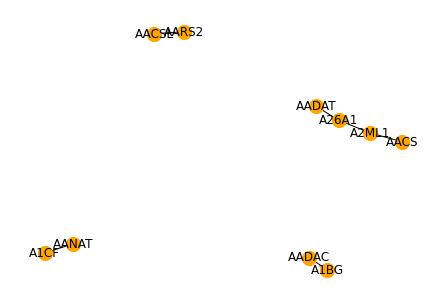

In [ ]:

# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'Gene1', 'Gene2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=200, edge_color='black', linewidths=1, font_size=12)